In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# STEP 1. Скачайте датасет.

Download the Adult training data set: http://archive.ics.uci.edu/ml/datasets/Adult
(file adult.data)

In [3]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [4]:
!head adult.data

"head" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


# Step 2. Поймите формат и зачитайте adult.data в переменную df. Используйте cols чтобы дать нормальные названия колонкам.

Обратите внимание на формат!

In [5]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'result']

In [6]:

df = pd.read_csv('adult.data', skipinitialspace=True, names=cols)

In [7]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Сколько мужчин и женщин?

In [8]:
df.sex.value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [9]:
df.sex.value_counts()['Male']

21790

In [10]:
df.sex.value_counts()['Female']

10771

# Средний возраст мужчин и женщин?

In [11]:
 df.groupby('sex')["age"].mean()['Male']



39.43354749885268

In [12]:
 df.groupby('sex')["age"].mean()['Female']

36.85823043357163

# Какая доля граждан США (United-States) в данном датасете?

In [13]:
df['native-country'].value_counts(True)['United-States']

0.895857006848684

# Нарисуйте распределние образования людей (используйте bar plot)

Подпишите график и оси.

In [14]:
education=pd.DataFrame(df.education.value_counts(True))
education

,education
HS-grad,0.322502
Some-college,0.223918
Bachelors,0.164461
Masters,0.052916
Assoc-voc,0.042443
11th,0.036086
Assoc-acdm,0.032769
10th,0.028654
7th-8th,0.019840
Prof-school,0.017690


Text(0, 0.5, 'Доля людей')

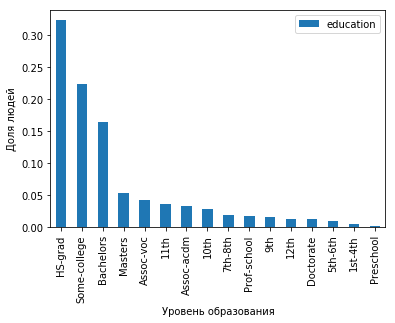

In [15]:
bar = education.plot.bar()
bar.set_xlabel('Уровень образования')
bar.set_ylabel('Доля людей')

# Какое среднее значние и квадратичное отклонение (std) fnlwgt (”final weight”) разведенных (divorced people) людей. Нарисуйте гистрограмму (Какое распределение оно вам напоминает?)

In [16]:
divorced = df['marital-status']=='Divorced'

print(df[divorced].fnlwgt.mean())
print(df[divorced].fnlwgt.std())

185802.79045689848
105646.78945933603


Text(0, 0.5, 'frequency')

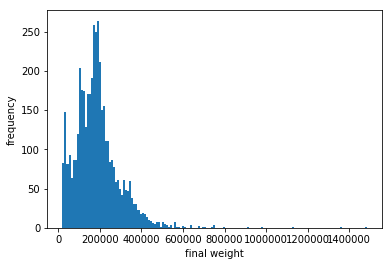

In [26]:
df_hist = df[divorced].fnlwgt
plot_hist = df_hist.plot.hist(bins=150)
plot_hist.set_xlabel('final weight')
plot_hist.set_ylabel('frequency')

df_hist = df[divorced].fnlwgt
plot_hist = df_hist.plot.hist(bins=50)
plot_hist.set_xlabel('final weight')
plot_hist.set_ylabel('frequency')

> Ответ: оно мне напоминает  распределение Пуассона

# Правда ли, что большинство людей, из тех кто получает больше 50k, с высшим образованием  (BSc, MSc, PhD - ????)

In [28]:
statistic_df = df.groupby('result')['education'].value_counts(normalize=True)['>50K']

In [46]:
print('образование людей,получающих>50k \n',statistic_df)


образование людей,получающих>50k 
 education
Bachelors       0.283255
HS-grad         0.213621
Some-college    0.176891
Masters         0.122306
Prof-school     0.053947
Assoc-voc       0.046040
Doctorate       0.039026
Assoc-acdm      0.033797
10th            0.007907
11th            0.007652
7th-8th         0.005101
12th            0.004209
9th             0.003443
5th-6th         0.002041
1st-4th         0.000765
Name: education, dtype: float64


In [47]:
percent=statistic_df['Doctorate']+statistic_df['Bachelors']+statistic_df[ 'Masters']
print('Люди с высшим образованием,получающиее >50к: {}'.format(percent))

Люди с высшим образованием,получающиее >50к: 0.4445861497258003


0.4272414232878459

> Ответ:  Нет.

# Сколько в среднем работают люди в неделю в зависимости от education?

In [ ]:
df.groupby('education')['hours-per-week'].mean()

# Кто больше работает в неделю - мужчины или женщины?

In [53]:
if(df.groupby('sex')['hours-per-week'].mean()['Male']<df.groupby('sex')['hours-per-week'].mean()['Female']):
    print("Женщины")
else:
    print("мужщины")


мужщины


# Кто больше работает в неделю - те кто в отношениях или те кто нет?

In [84]:
not_related = df.relationship.isin(['Not-in-family', 'Unmarried'])
print('work not in relations:', df[not_related]['hours-per-week'].mean())
print('work in relations:', df[~not_related]['hours-per-week'].mean())

Not in relations: 40.157944004765554
In relations: 40.595290725612685


# Из каких стран люди работают farmers/fishers?

In [85]:
print(df.groupby('occupation')['native-country'].value_counts()['Farming-fishing'])

native-country
United-States    879
Mexico            77
?                  5
Puerto-Rico        5
Guatemala          4
Philippines        4
Canada             2
Cuba               2
El-Salvador        2
Italy              2
Vietnam            2
Cambodia           1
England            1
France             1
Germany            1
Hong               1
Ireland            1
Japan              1
Poland             1
Portugal           1
Yugoslavia         1
Name: native-country, dtype: int64


# Сколько максимум работают люди в неделю? Как много таких людей кто работает наибольшее количество часов? Какой у них доход (распечатать)?

In [87]:
maximum_hours = df['hours-per-week'].max()
print('Максимум часов в неделю ', maximum_hours)


Максимум часов в неделю  99


In [88]:
print('количество людей,работающих столько:', df['hours-per-week'].value_counts()[maximum_hours])



количество людей,работающих столько: 85


In [89]:
print('доход', df.groupby('hours-per-week')['result'].value_counts()[maximum_hours])

With salary less than 50K: result
<=50K    60
>50K     25
Name: result, dtype: int64
